In [26]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [27]:
Ava = pd.read_csv(r"C:\Users\sivap\OneDrive\Documents\avocado.csv\avocado.csv",parse_dates=['Date','year'])
Ava.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015-01-01,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015-01-01,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015-01-01,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015-01-01,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015-01-01,Albany


In [28]:
Ava['year'] = pd.DatetimeIndex(Ava['year']).year

In [29]:
Ava = Ava.drop(['Unnamed: 0'],axis =1)

In [30]:
Ava.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [31]:
Ava.shape

(18249, 13)

In [32]:
Ava.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [33]:
Ava.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [34]:
Ava.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [35]:
Ava.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [36]:
Ava['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

## EDA

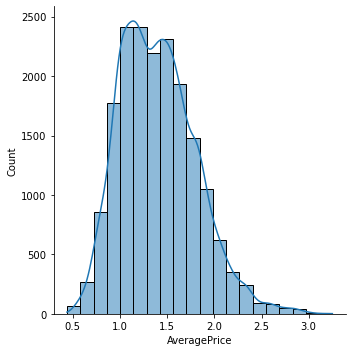

In [37]:
sns.displot(Ava['AveragePrice'],bins=20,kde=True)


- Average price has a distribution close to normal distribution

conventional    9126
organic         9123
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

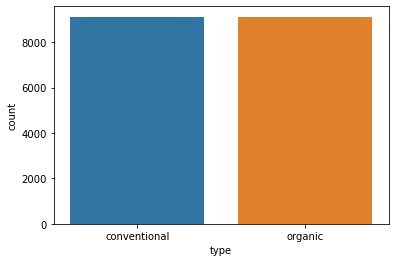

In [16]:
print(Ava['type'].value_counts())
sns.countplot(x='type',data= Ava)

- there are about the same amout of conventional and organic type of Avocados

<AxesSubplot:xlabel='year', ylabel='count'>

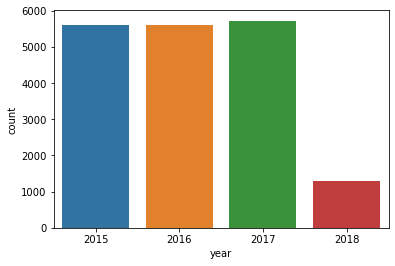

In [17]:
Ava['year'].value_counts()
sns.countplot(x='year',data= Ava)

retail of avacado in the year 2018 seem to have markedly reduced

In [18]:
Avacado_sorted=Ava.groupby('year').sum()
Avacado_sorted

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
year,,,,,,,,,
2015,7723.94,4.385469e+09,1.709450e+09,1.761054e+09,1.427724e+08,7.721922e+08,6.346827e+08,1.320664e+08,5443128.28
2016,7517.80,4.820890e+09,1.525123e+09,1.672728e+09,1.598798e+08,1.463159e+09,1.106494e+09,3.366263e+08,20038284.84
2017,8669.56,4.934306e+09,1.652038e+09,1.544735e+09,9.121751e+07,1.646289e+09,1.222953e+09,3.993390e+08,23997172.34
2018,1746.40,1.382738e+09,4.604997e+08,4.077587e+08,2.293259e+07,4.915359e+08,3.607414e+08,1.235840e+08,7210591.87


<AxesSubplot:xlabel='year'>

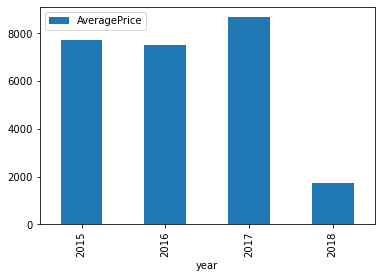

In [19]:
Avacado_sorted.plot(y='AveragePrice',kind='bar')

- In the year 2017,AverageOrice was seen to be high

<AxesSubplot:xlabel='year'>

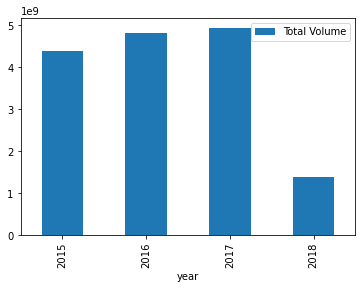

In [20]:
Avacado_sorted.plot(y='Total Volume',kind = 'bar')

- We see that the production of avocados was less in 2018, which also links us with the point as to why the average price was seen very less

<Figure size 1440x720 with 0 Axes>

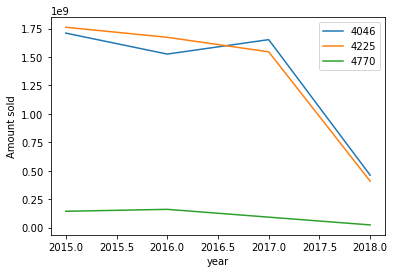

In [21]:
plt.figure(figsize=(20,10))
PLU = Avacado_sorted[['4046','4225','4770']]
PLU.plot(kind='line',stacked = False)
plt.xlabel('year')
plt.ylabel('Amount sold')

plt.show()

- 4046 is seen to be sold the least out of the three.
- though 4225 was leading initially, it was overtaken by 4225

<AxesSubplot:xlabel='year'>

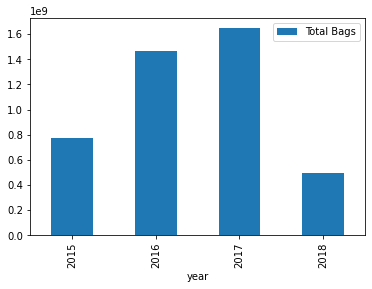

In [22]:
Avacado_sorted.plot(y='Total Bags',kind = 'bar')


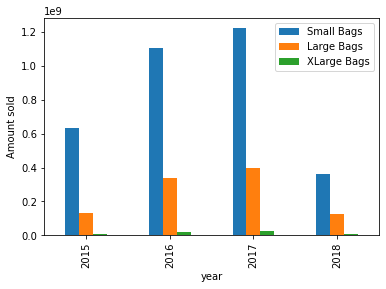

In [22]:
Bags = Avacado_sorted[['Small Bags','Large Bags','XLarge Bags']]
Bags.plot(kind='bar',stacked = False)
plt.xlabel('year')
plt.ylabel('Amount sold')

plt.show()

- we can see that all the bag types that were being sold were steadily increasing until 2017, of which small bags were being sold the most, which then dipped in 2018

<function matplotlib.pyplot.show(close=None, block=None)>

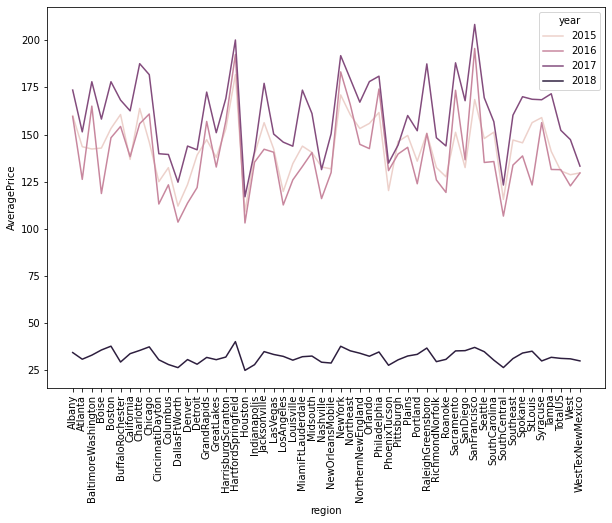

In [23]:
plt.figure(figsize =(10, 7))
Ava_reg= Ava.groupby(['region','year']).agg({'AveragePrice':sum})
sns.lineplot(x='region',y='AveragePrice',hue='year',data=Ava_reg)
plt.xticks(rotation=90)
plt.show

- Here we can have an overall idea where the prices were high in each region, during different years

In [24]:
Ava_reg

AveragePrice
region           year              
Albany           2015        160.03
                 2016        159.53
                 2017        173.61
                 2018         34.46
Atlanta          2015        143.58
...                             ...
West             2018         31.13
WestTexNewMexico 2015        129.71
                 2016        129.65
                 2017        133.28
                 2018         30.03

[216 rows x 1 columns]

## Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()
for i in Ava.columns:
    if Ava[i].dtype== 'object':
        Ava[i] = enc.fit_transform(Ava[i].values)

In [39]:
Ava_new.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region_44,region_45,region_46,region_47,region_48,region_49,region_50,region_51,region_52,region_53
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0,0,0,0,0,0,0,0,0,0


## Correlation

In [42]:
corr=Ava.corr()
corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280


<AxesSubplot:>

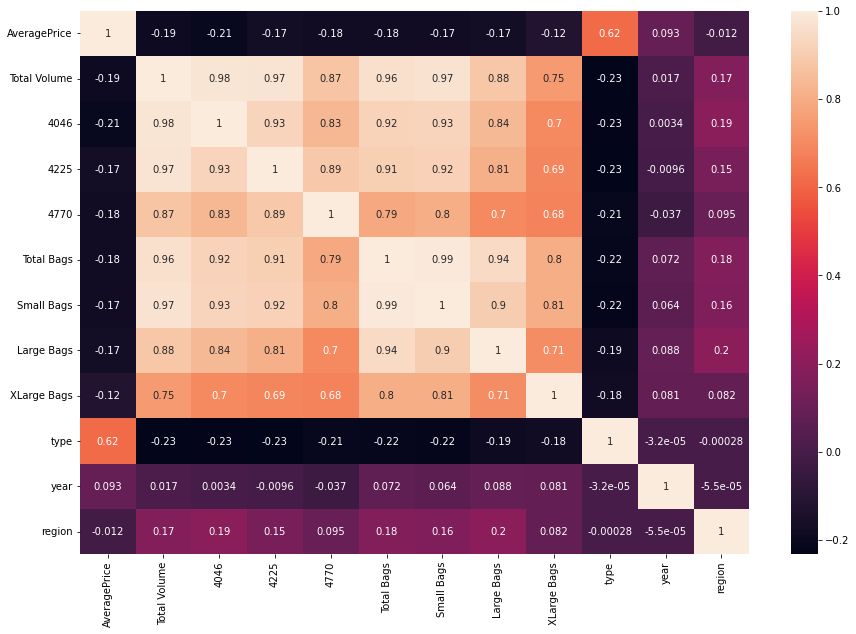

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot = True)

In [44]:
corr_matrix= Ava.corr()
pd.set_option("display.max_rows", None)
corr_matrix['AveragePrice'].sort_values(ascending= False)

AveragePrice    1.000000
type            0.615845
year            0.093197
region         -0.011716
XLarge Bags    -0.117592
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64

In [81]:
corr_matrix= Ava.corr()
pd.set_option("display.max_rows", None)
corr_matrix['region'].sort_values(ascending= False)

region          1.000000
4046            0.196918
Large Bags      0.133660
Total Bags      0.112620
Total Volume    0.109462
Small Bags      0.098960
4225            0.080366
4770            0.073381
XLarge Bags     0.014411
year           -0.000055
type           -0.000280
AveragePrice   -0.011716
Name: region, dtype: float64

## Handling Skewness

In [171]:
Ava.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
region           0.000030
dtype: float64

- Data is heavily skewed.
- We need to handle the skewness present in non-categorical data

In [45]:
i= ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer()

Ava[i]= transformer.fit_transform(Ava[i].values)
Ava.skew()

AveragePrice    0.580303
Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
type            0.000329
year            0.215339
region          0.000030
dtype: float64

- skewness in numerical columns is mostly handled

## Checking for outliers

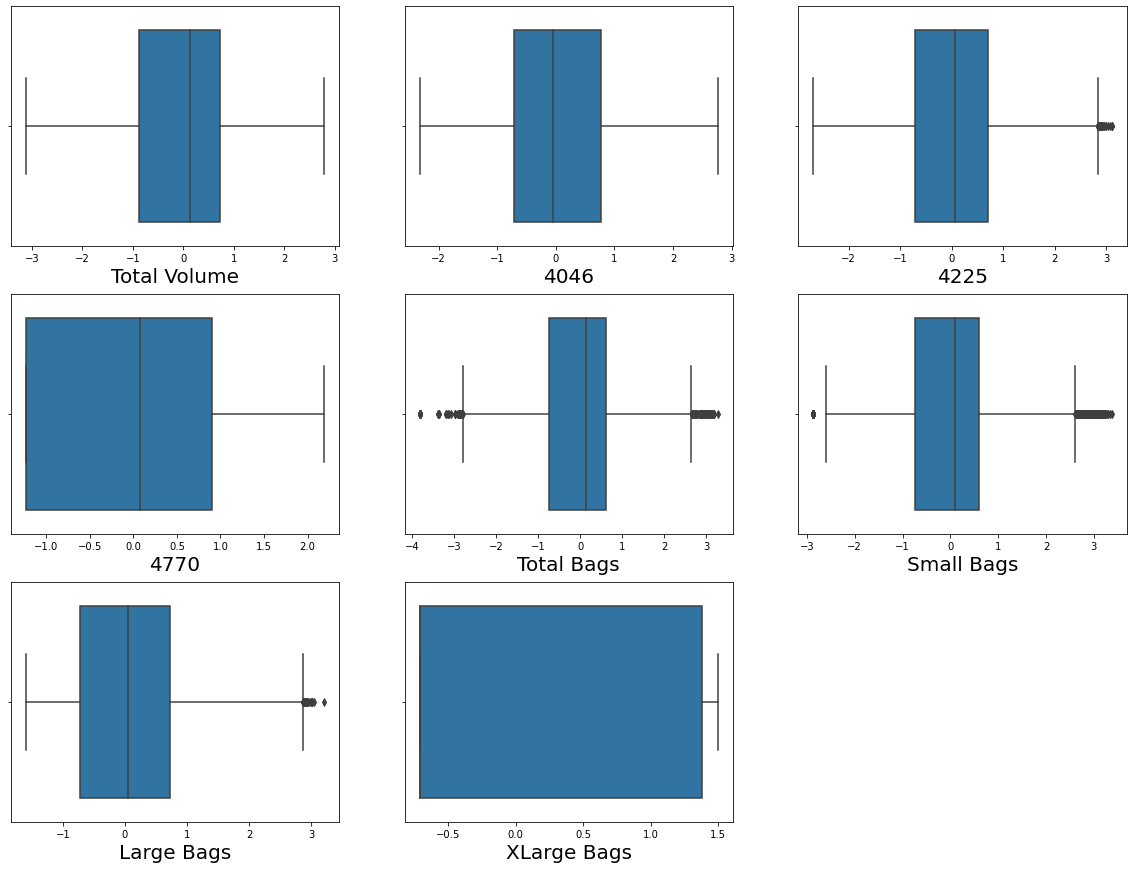

In [50]:
f= Ava_new[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]

plt.figure(figsize =(20,15), facecolor='white')
plotnumber=1
for i in f.columns:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(f[i])
        plt.xlabel(i,fontsize=20)
    
    plotnumber +=1
plt.show()


### Splitting Data

In [46]:
X = Ava.drop(['AveragePrice','Date'],axis=1)
y= Ava['AveragePrice']

In [47]:
X.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,0,2015,0
1,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,0,2015,0
2,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,0,2015,0
3,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,0,2015,0
4,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,0,2015,0


In [48]:
x1 =Ava.drop(['region','Date'],axis=1)
y1 =Ava['region']

## Scaling Data

In [51]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [52]:
x_scaled= scaler.fit_transform(X)

In [53]:
#for regression
x= pd.DataFrame(x_scaled)
x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-1.221282,-1.700252
1,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-1.221282,-1.700252
2,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-1.221282,-1.700252
3,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,-1.221282,-1.700252
4,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,-1.221282,-1.700252


In [54]:
#for classification
x1_scaled= scaler.fit_transform(x1)
x1= pd.DataFrame(x1_scaled)
x1.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.188689,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-1.221282
1,-0.139020,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-1.221282
2,-1.182069,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-1.221282
3,-0.809551,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,-1.221282
4,-0.312861,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,-1.221282


In [71]:
from imblearn.over_sampling import SMOTE

x1,y1= SMOTE().fit_resample(x1,y1)

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    338
Name: region, dtype: int64


<AxesSubplot:xlabel='region', ylabel='count'>

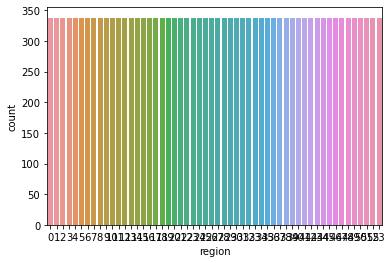

In [73]:
print(y1.value_counts())
sns.countplot(y1)

## Model Building

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score


In [56]:
MaxR2 = 0
MaxRS =0
for i in range(1,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=i)
    r = RandomForestRegressor()
    r.fit(X_train,y_train)
    predr= r.predict(X_test)
    acc= r2_score(y_test,predr)
    print('r2',acc,'random_state',1)
    
    if acc>MaxR2:
        MaxR2=acc
        MaxRS= i
print('Best r2 score is', MaxR2,'at random state', MaxRS)

r2 0.8422874737709931 random_state 1
r2 0.8373223692245909 random_state 1
r2 0.8485878703221583 random_state 1
r2 0.8405161313435794 random_state 1
r2 0.8379480317257579 random_state 1
r2 0.8538509390087743 random_state 1
r2 0.839305395341609 random_state 1
r2 0.8460110787692514 random_state 1
r2 0.837014511456216 random_state 1
r2 0.848026351970066 random_state 1
r2 0.84398618976241 random_state 1
r2 0.8455188654651485 random_state 1
r2 0.8467857526128233 random_state 1
r2 0.8500048340105746 random_state 1
r2 0.8360172123766461 random_state 1
r2 0.8388807599271073 random_state 1
r2 0.836652361909245 random_state 1
r2 0.8332402432667698 random_state 1
r2 0.833322045149167 random_state 1
r2 0.8532354287046294 random_state 1
r2 0.8514221972879166 random_state 1
r2 0.842221791658034 random_state 1
r2 0.8419259069511335 random_state 1
r2 0.8459966771238382 random_state 1
r2 0.8436575035180152 random_state 1
r2 0.8455333386986419 random_state 1
r2 0.8435759349923961 random_state 1
r2 0.8484

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state= 29)

In [58]:
algorithm = [LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),SVR(),Ridge()]
for i in algorithm:
    print(i)
    i.fit(X_train,y_train)
    pred = i.predict(X_test)
    
    print('R2 score: ',r2_score(y_test,pred))
    print('MAE: ',mean_absolute_error(y_test,pred))
    print('MSE: ',mean_squared_error(y_test,pred))
    print('RMSE: ',np.sqrt(mean_squared_error(y_test,pred)))
    cv = cross_val_score(i,X,y,cv=5)
    
    print('Cross Validation Score: ', cv.mean())
    print('Difference in cross val score', r2_score(y_test,pred)- abs(cv.mean()))
    print('**'*50)
    

LinearRegression()
R2 score:  0.5445214720510559
MAE:  0.2097633009304408
MSE:  0.07371011115690398
RMSE:  0.2714960610338647
Cross Validation Score:  0.20112369568125268
Difference in cross val score 0.3433977763698033
****************************************************************************************************
RandomForestRegressor()
R2 score:  0.854838600465916
MAE:  0.10852323287671231
MSE:  0.02349147597260274
RMSE:  0.15326929233412262
Cross Validation Score:  0.2342520080695898
Difference in cross val score 0.6205865923963262
****************************************************************************************************
DecisionTreeRegressor()
R2 score:  0.7025554185280353
MAE:  0.1452730593607306
MSE:  0.0481354703196347
RMSE:  0.2193979724601727
Cross Validation Score:  -0.5432265115800489
Difference in cross val score 0.1593289069479864
****************************************************************************************************
KNeighborsRegressor()
R2 sco

## Regularization

In [59]:
from sklearn.linear_model import Ridge, RidgeCV,LassoCV,Lasso

In [60]:
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01), normalize =True)
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [61]:
alpha = ridgecv.alpha_
alpha

0.001

In [62]:
ridge_reg = Ridge(alpha)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=0.001)

In [63]:
ridge_reg.score(X_test,y_test)

0.5445214600324316

- ridge regression performed better hence we will select it as our best model

## Saving Model 

In [64]:
import joblib
joblib.dump(ridge_reg,'Avacado_Price_Prediction.pkl')

['Avacado_Price_Prediction.pkl']

## Classification Model

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report


In [66]:
MaxAcc = 0
MaxRS =0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.30,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x1_train,y1_train)
    predrf= rf.predict(x1_test)
    acc= accuracy_score(y1_test,predrf)
    print('accuracy',acc,'random_state',1)
    if acc>MaxAcc:
        MaxAcc=acc
        MaxRS= i
print('Best accuracy is', MaxAcc,'at random state', MaxRS)

accuracy 0.9037442922374429 random_state 1
accuracy 0.9041095890410958 random_state 1
accuracy 0.9028310502283104 random_state 1
accuracy 0.903013698630137 random_state 1
accuracy 0.9057534246575343 random_state 1
accuracy 0.8989954337899544 random_state 1
accuracy 0.9008219178082192 random_state 1
accuracy 0.9011872146118721 random_state 1
accuracy 0.9000913242009132 random_state 1
accuracy 0.8975342465753424 random_state 1
accuracy 0.9057534246575343 random_state 1
accuracy 0.9031963470319635 random_state 1
accuracy 0.9046575342465754 random_state 1
accuracy 0.8997260273972603 random_state 1
accuracy 0.8993607305936073 random_state 1
accuracy 0.9055707762557078 random_state 1
accuracy 0.9048401826484018 random_state 1
accuracy 0.9011872146118721 random_state 1
accuracy 0.9024657534246575 random_state 1
accuracy 0.8949771689497716 random_state 1
accuracy 0.9048401826484018 random_state 1
accuracy 0.9063013698630137 random_state 1
accuracy 0.9046575342465754 random_state 1
accuracy 0.8

In [67]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=.30,random_state= 66)

In [74]:
algorithm = [LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),SVC()]
for i in algorithm:
    print(i)
    i.fit(x1_train,y1_train)
    pred = i.predict(x1_test)
    
    print('Accuracy: \n',accuracy_score(y1_test,pred))
    print('Confusion matrix: \n',confusion_matrix(y1_test,pred))
    print('Classification report: \n',classification_report(y1_test,pred))
    cv = cross_val_score(i,x1,y1,cv=10)
    
    print('Cross Validation Score: \n', cv.mean())
    print('Difference in cross val score\n', accuracy_score(y1_test,pred)- abs(cv.mean()))
    print('**'*50)


LogisticRegression()
Accuracy: 
 0.5515981735159817
Confusion matrix: 
 [[ 50   0   0 ...   0   0   0]
 [  0  39   0 ...   0   0   0]
 [  0   0  73 ...   0   0   4]
 ...
 [  0   0   0 ...  97   1   0]
 [  0   0   0 ...   0 101   0]
 [  0   1   1 ...   0   0  20]]
Classification report: 
               precision    recall  f1-score   support

           0       0.56      0.54      0.55        92
           1       0.28      0.39      0.32       100
           2       0.73      0.70      0.72       104
           3       0.62      0.45      0.52        96
           4       0.55      0.54      0.54        99
           5       0.50      0.56      0.53        93
           6       0.84      0.88      0.86       111
           7       0.53      0.71      0.61        94
           8       0.69      0.77      0.73       111
           9       0.57      0.78      0.66       110
          10       0.53      0.47      0.50       108
          11       0.60      0.74      0.66       103
        

- Over all SVC has the better cross validation score(72%) and accuracy(80.87%) and select as the best model

## Hyperparameter Tuning

In [75]:
from sklearn.model_selection import GridSearchCV

In [79]:
param_grid ={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001], 'kernel':['rbf']}

In [80]:
grid = GridSearchCV(SVC(),param_grid,refit= True, verbose=3)
grid.fit(x1_train,y1_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.691 total time=  28.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.717 total time=  28.9s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.695 total time=  29.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.701 total time=  28.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.717 total time=  29.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.462 total time=  25.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.485 total time=  25.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.465 total time=  25.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.482 total time=  25.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.480 total time=  25.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.054 total time=  31.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [83]:
print(grid.best_params_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [82]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.1)


In [84]:
grid_pred = grid.best_estimator_.predict(x1_test)
accuracy_score(y1_test,grid_pred)

0.9207305936073059

- Our score improved from 80.87% to 92%. Let us save this model

# Saving Model

In [88]:
import joblib
joblib.dump(grid.best_estimator_,'AvacadoClassification.pkl')

['AvacadoClassification.pkl']